In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [108]:
def resid_plot_func(column_name, dataframe):
    fig, ax = plt.subplots()
    for i in dataframe.columns:
        ax = sns.residplot(x = column_name, y = i, data = dataframe)
        plt.show()

In [109]:
def linear_regression_plot_func(column_name, dataframe):
    fig, ax = plt.subplots()
    for i in dataframe.columns:
        ax = sns.regplot(x = column_name, y = i, data = dataframe)
        plt.show()

In [110]:
path = os.getcwd()

In [111]:
path

'/Users/fredjun/Python_Scripts'

In [112]:
data = pd.read_csv('/Users/fredjun/Desktop/Algerian_forest_fires_dataset_UPDATE.csv', header=1, sep=',')

In [113]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [114]:
sums_stats = data.describe()

In [115]:
sums_stats = sums_stats.drop(['day', 'month', 'year'], axis =1)

In [116]:
sums_stats.to_csv('sum_stats.csv')

In [117]:
sums_stats.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

# Inital analysis

### Normality 

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. 

In [118]:
continous_data = data.drop(['day', 'month', 'year', 'Classes  '], axis =1)

In [119]:
data = data.drop(['day'], axis=1)

In [124]:
continous_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


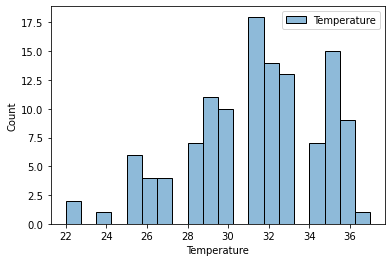

p_value = 0.0012336352374404669
alpha_value_corrected_for_multiple_testing = 0.005


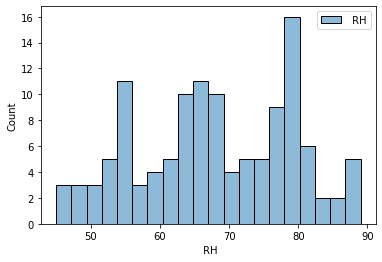

p_value = 0.011849685572087765
alpha_value_corrected_for_multiple_testing = 0.005


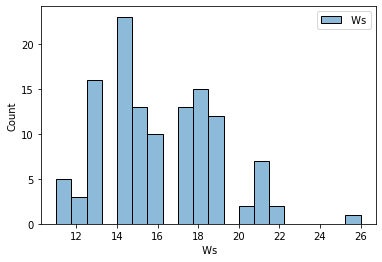

p_value = 0.0006247121491469443
alpha_value_corrected_for_multiple_testing = 0.005


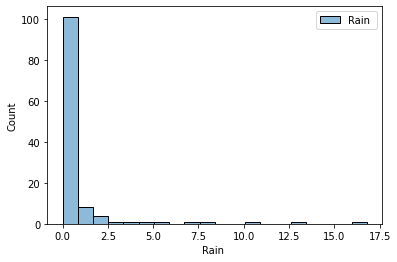

p_value = 2.2843214616698408e-20
alpha_value_corrected_for_multiple_testing = 0.005


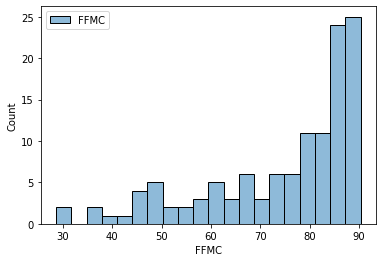

p_value = 6.902519111839922e-10
alpha_value_corrected_for_multiple_testing = 0.005


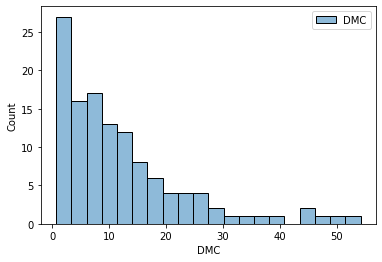

p_value = 1.4981615947817772e-10
alpha_value_corrected_for_multiple_testing = 0.005


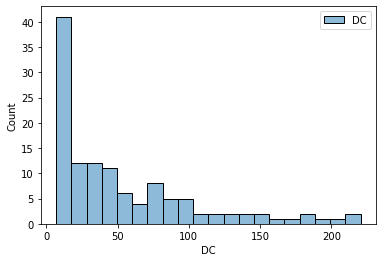

p_value = 1.0266645866785495e-10
alpha_value_corrected_for_multiple_testing = 0.005


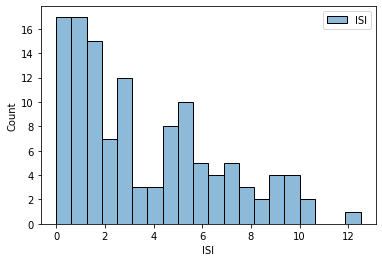

p_value = 6.030615509189374e-07
alpha_value_corrected_for_multiple_testing = 0.005


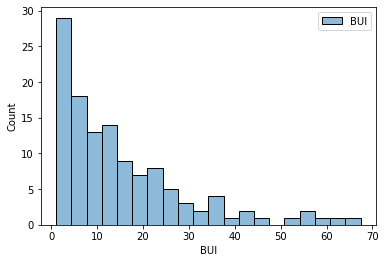

p_value = 1.26433197245035e-10
alpha_value_corrected_for_multiple_testing = 0.005


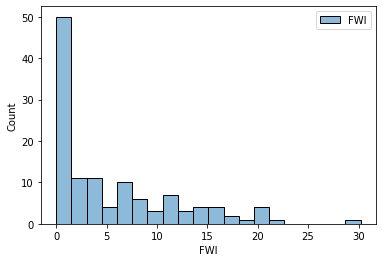

p_value = 1.2252233949627822e-10
alpha_value_corrected_for_multiple_testing = 0.005


In [128]:
fig, ax = plt.subplots()
for i in continous_data.columns:
    ax = sns.histplot(continous_data[[i]], bins=20)
    ax.set_xlabel(i)
    plt.show()
    statistic, p_value = shapiro(continous_data[i])
    corrected_signaficance_for_multiple_testing = 0.05/len(continous_data.columns)
    print('p_value = '+str(p_value))
    print('alpha_value_corrected_for_multiple_testing = '+str(corrected_signaficance_for_multiple_testing))

In [ ]:
g = sns.FacetGrid(continous_data, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

### Correlation 

In [60]:
continous_data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


In [61]:
matrix = np.triu(continous_data.corr())

<AxesSubplot:>

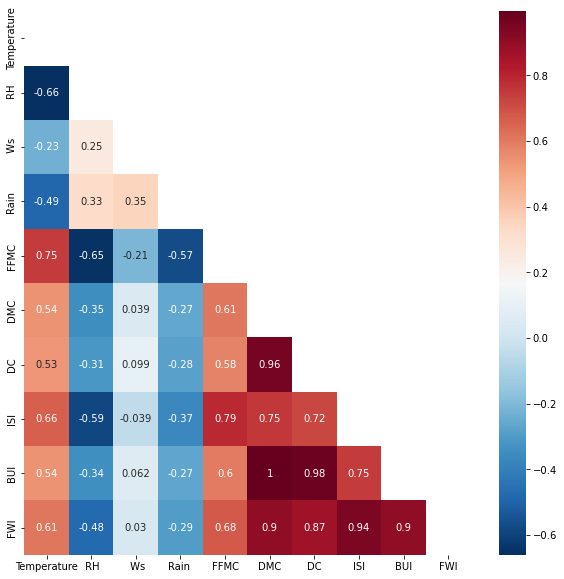

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(continous_data.corr(), annot=True, cmap=('RdBu_r'), mask=matrix)

<AxesSubplot:>

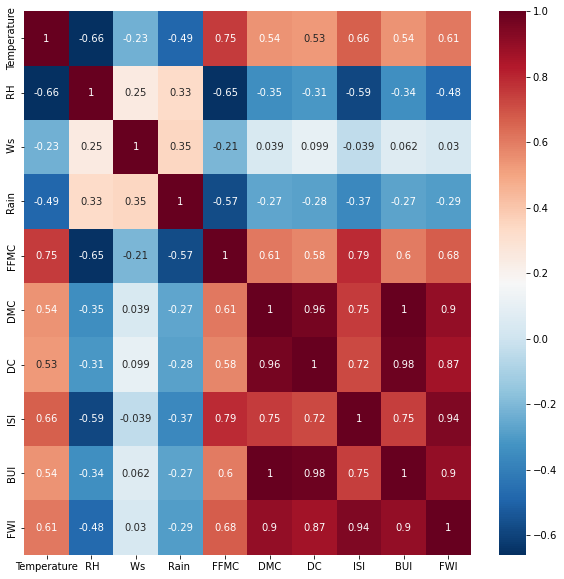

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(continous_data.corr(), annot=True, cmap=('RdBu_r'))

### Linear regression plots 

Linear regression plots


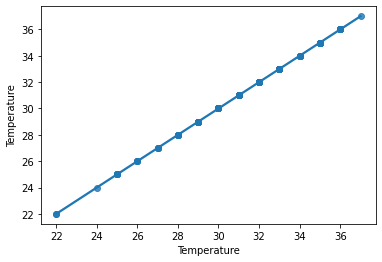

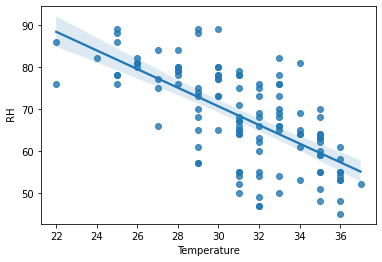

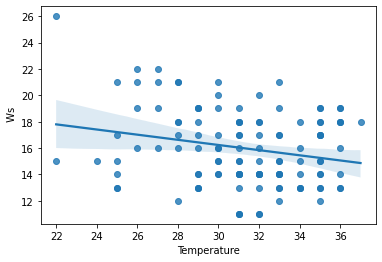

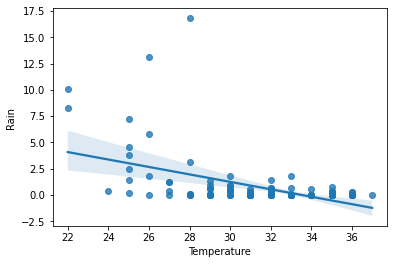

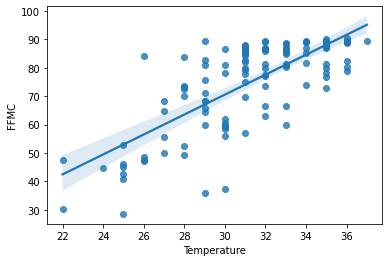

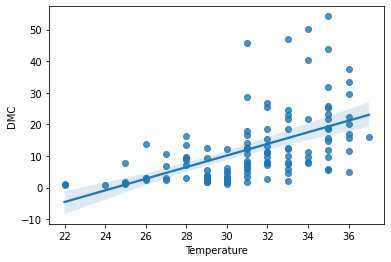

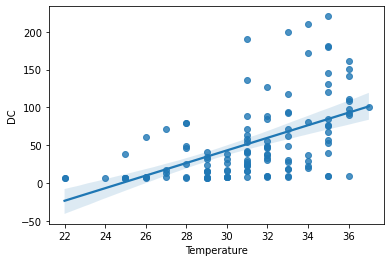

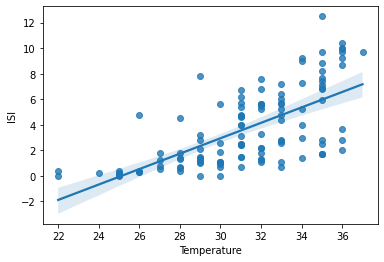

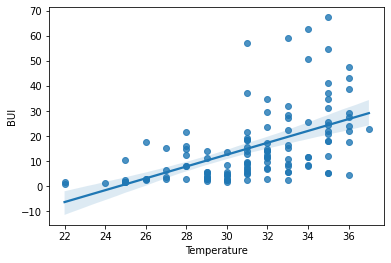

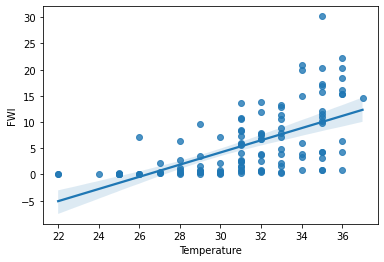

Linear regression plots


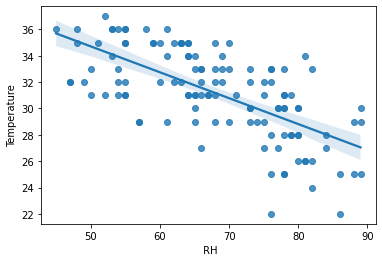

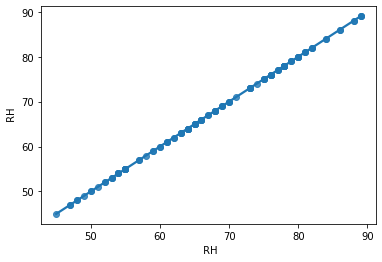

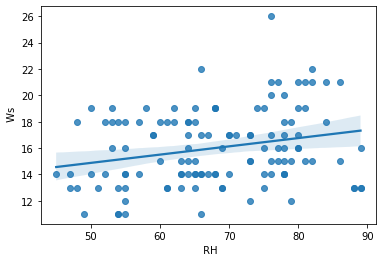

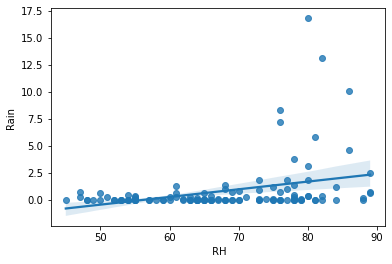

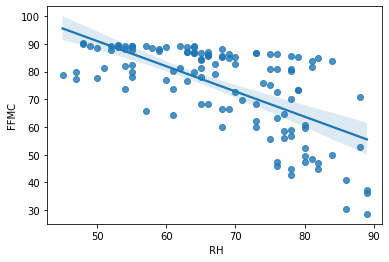

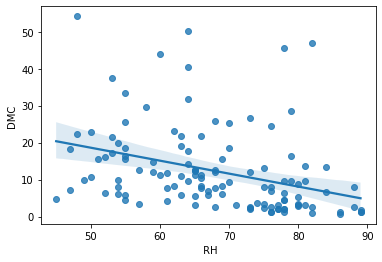

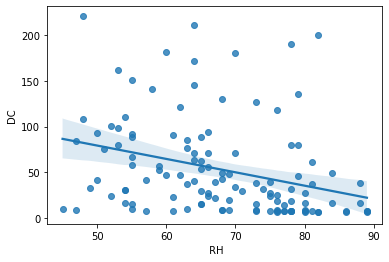

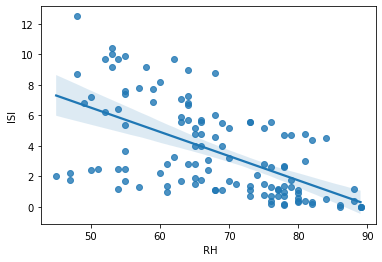

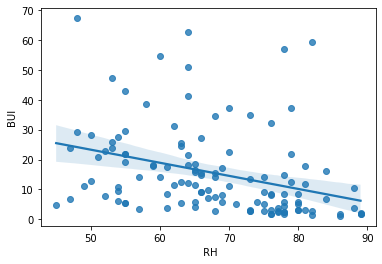

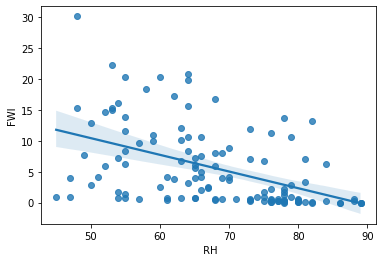

Linear regression plots


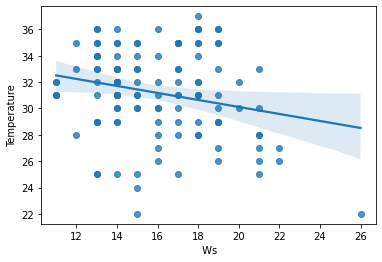

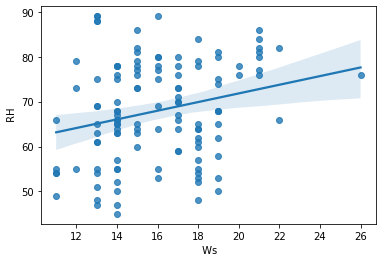

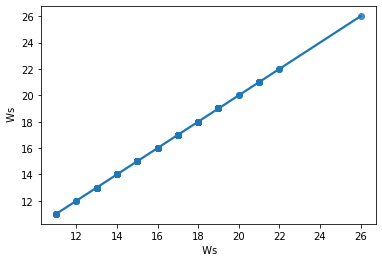

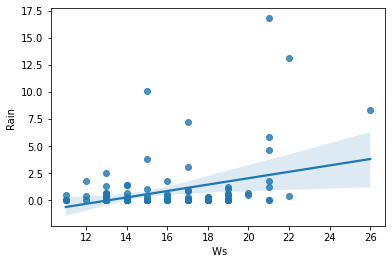

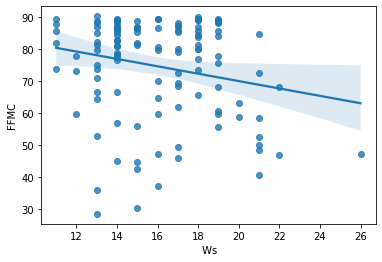

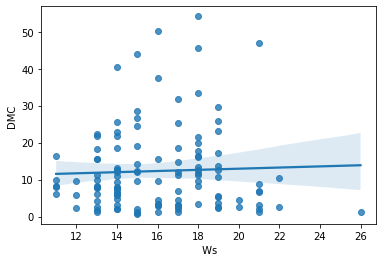

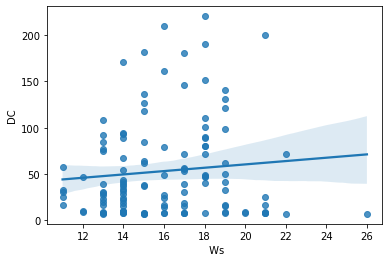

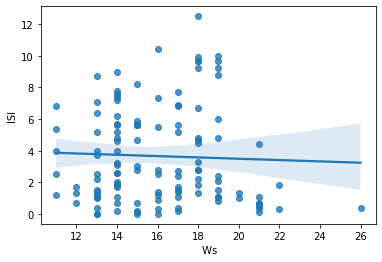

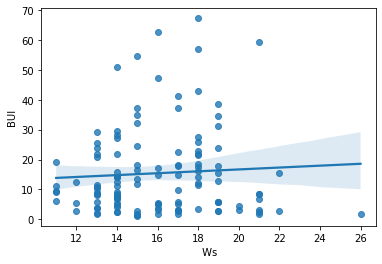

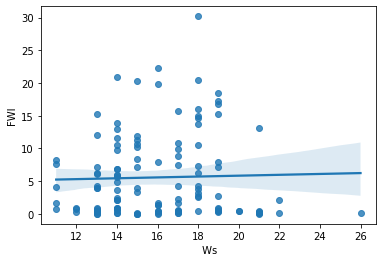

Linear regression plots


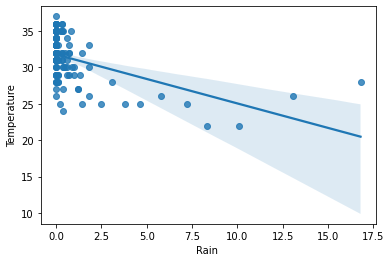

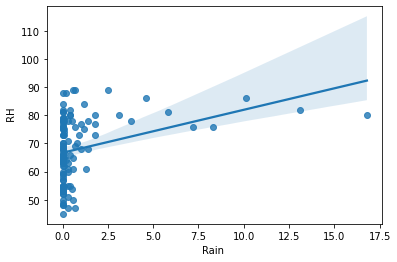

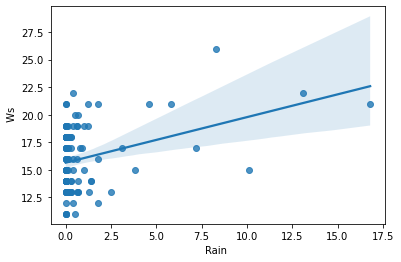

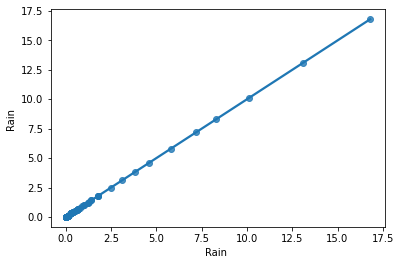

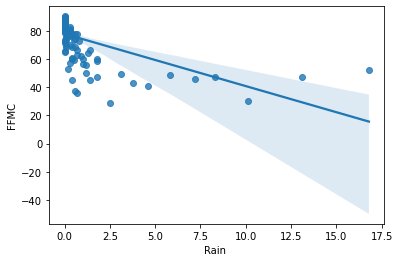

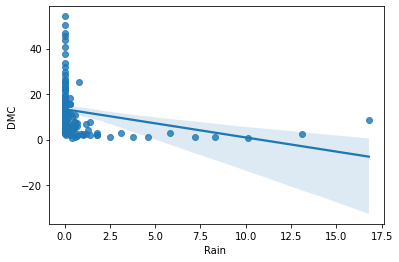

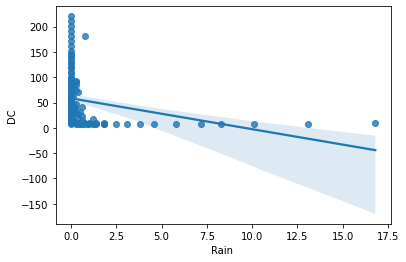

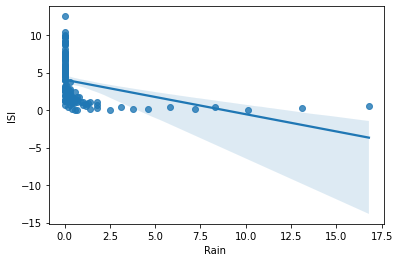

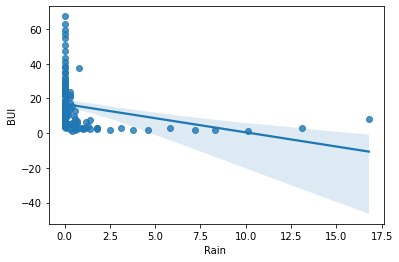

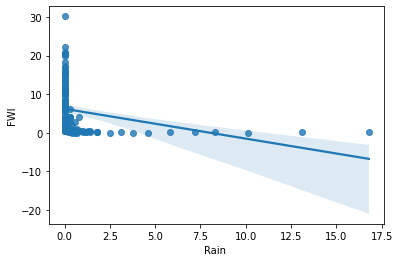

Linear regression plots


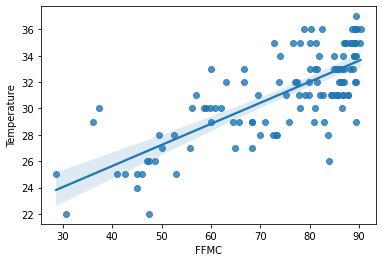

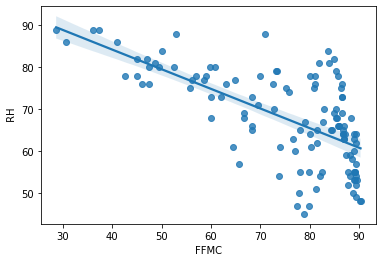

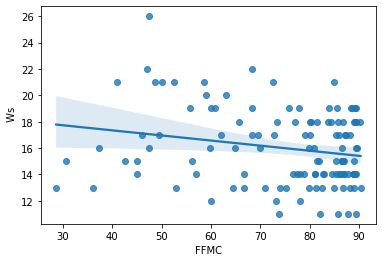

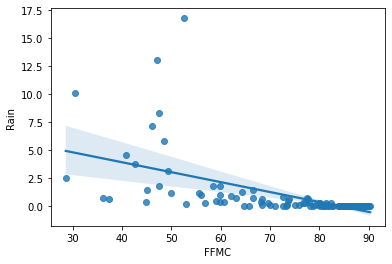

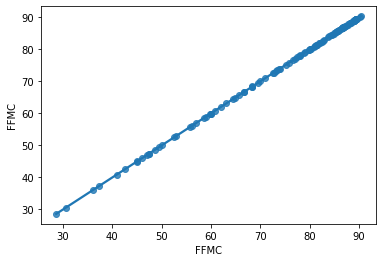

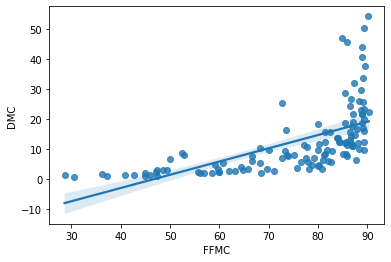

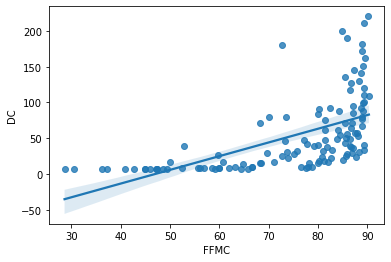

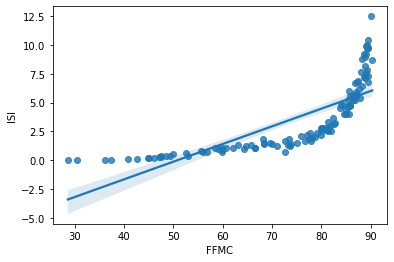

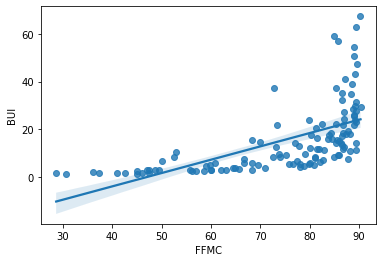

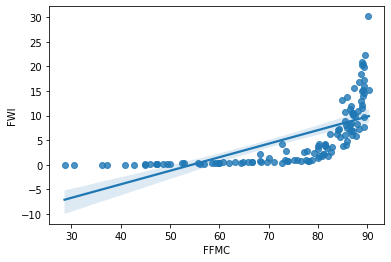

Linear regression plots


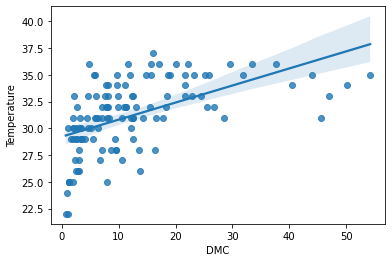

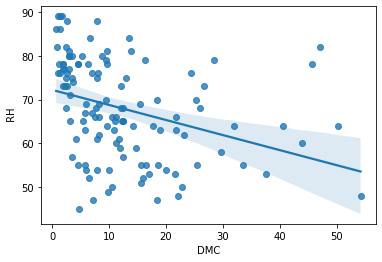

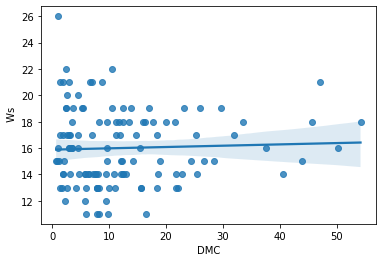

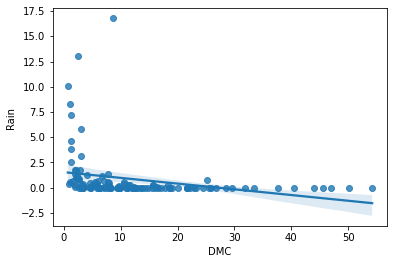

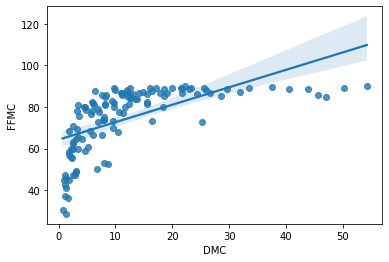

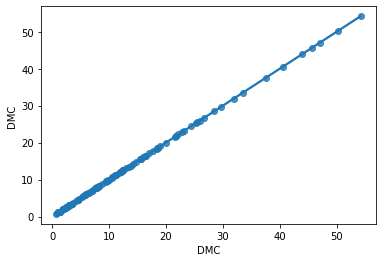

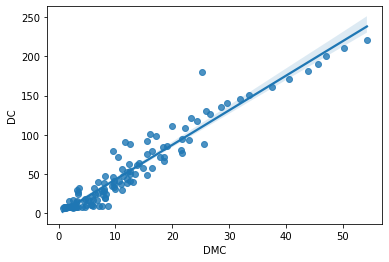

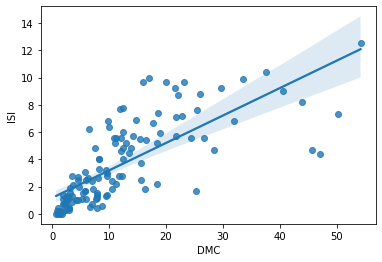

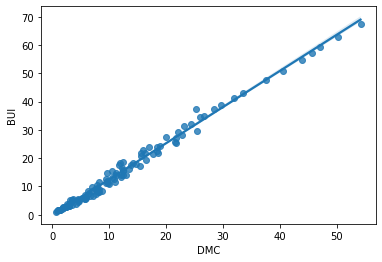

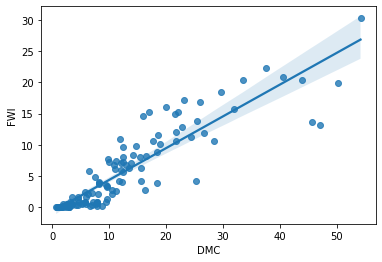

Linear regression plots


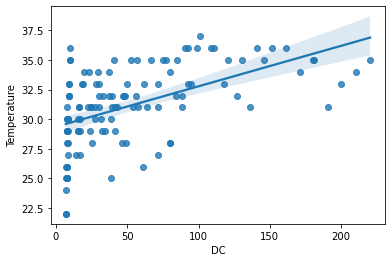

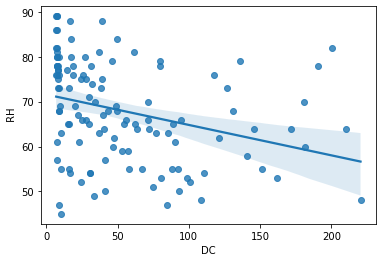

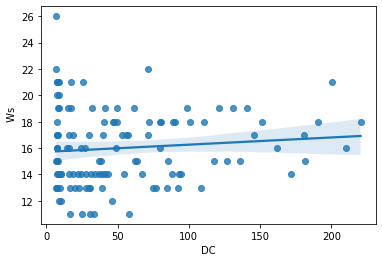

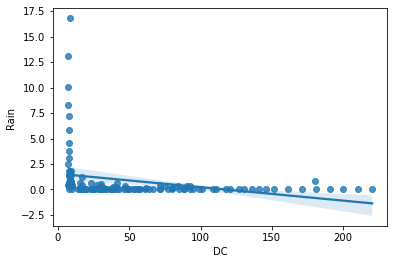

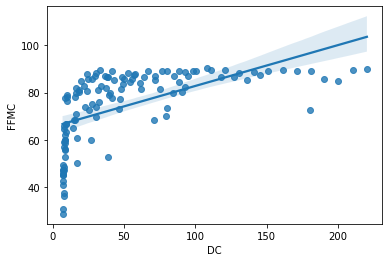

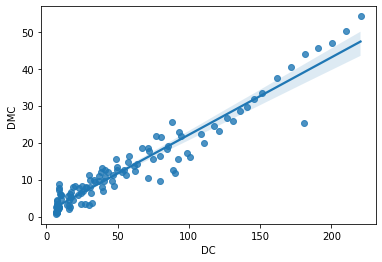

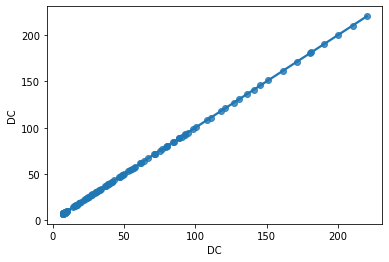

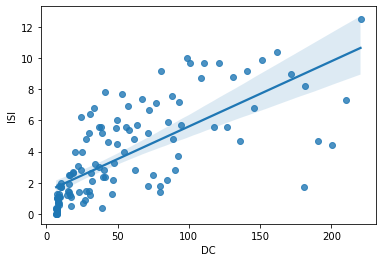

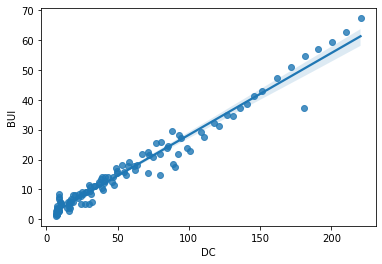

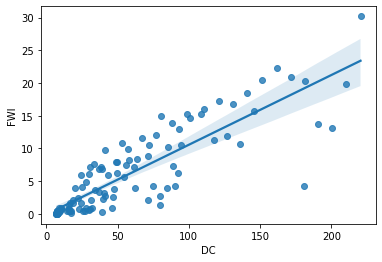

Linear regression plots


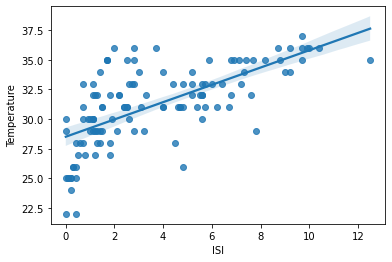

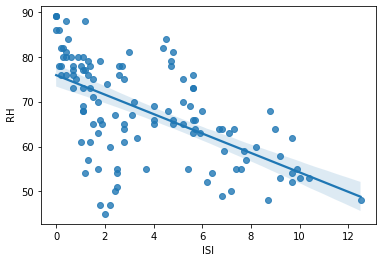

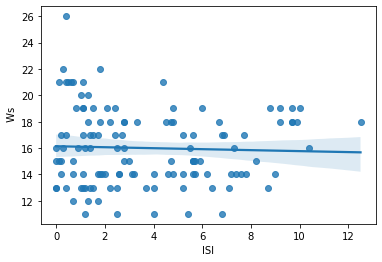

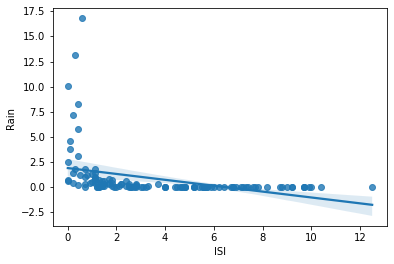

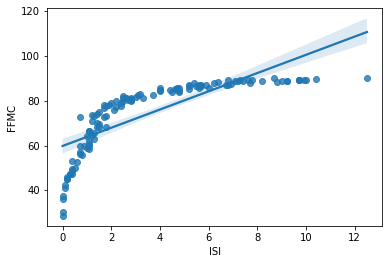

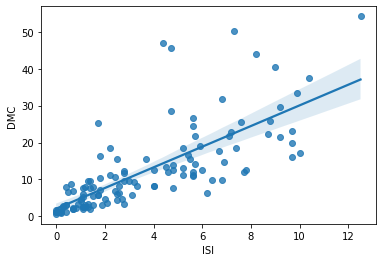

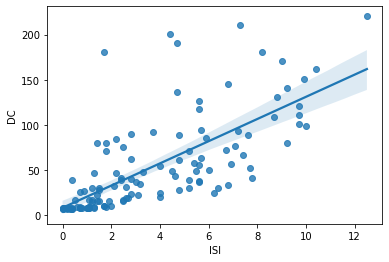

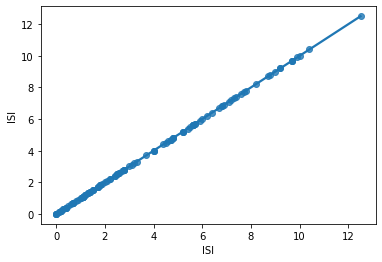

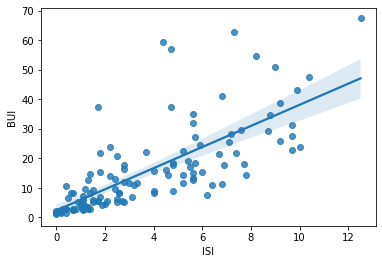

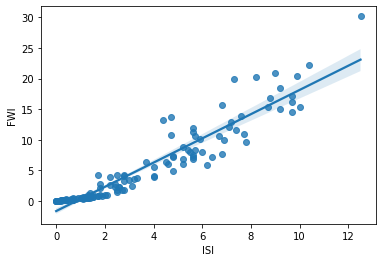

Linear regression plots


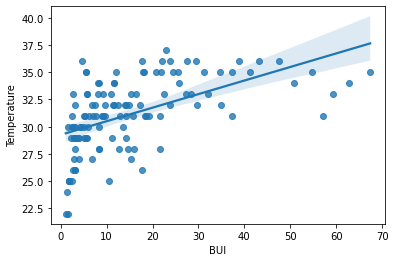

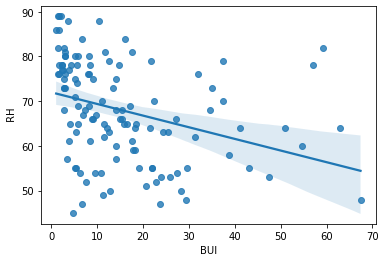

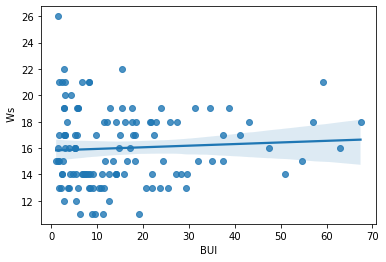

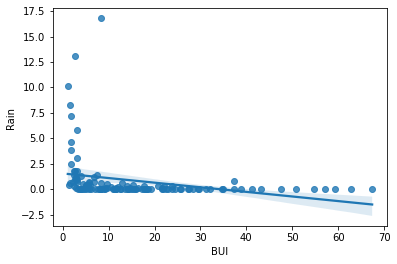

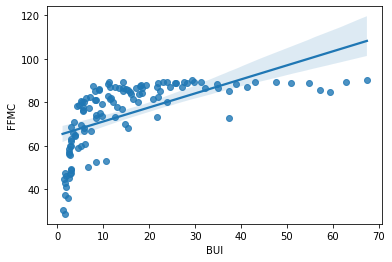

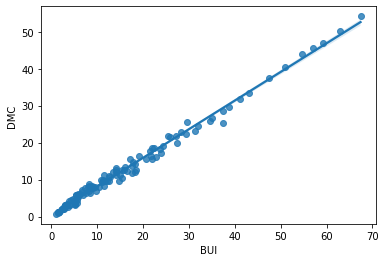

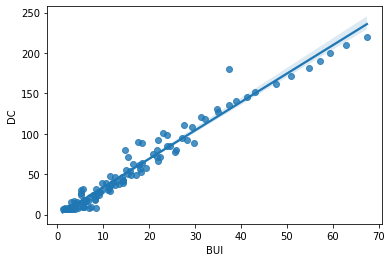

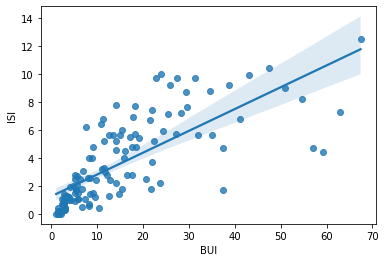

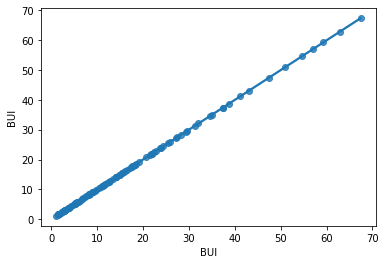

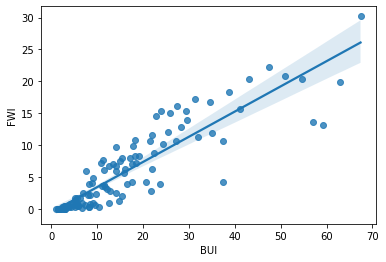

Linear regression plots


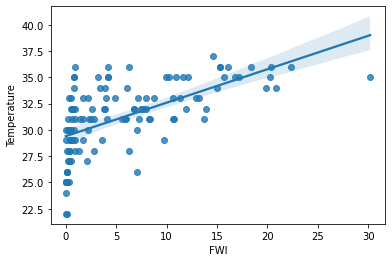

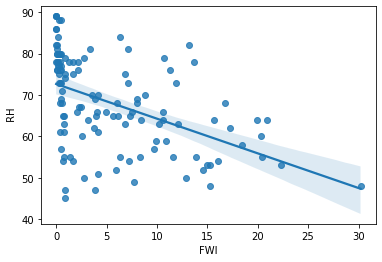

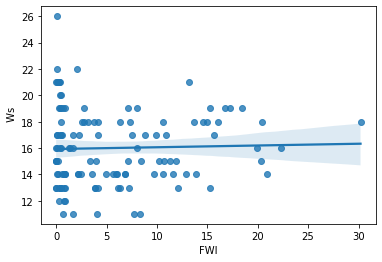

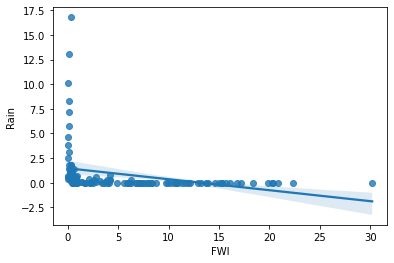

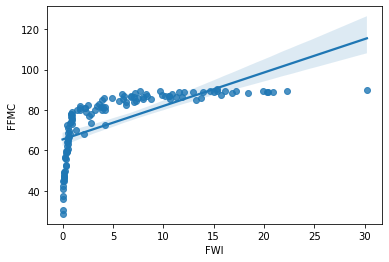

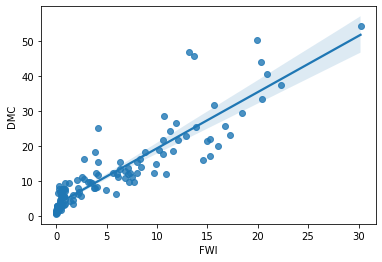

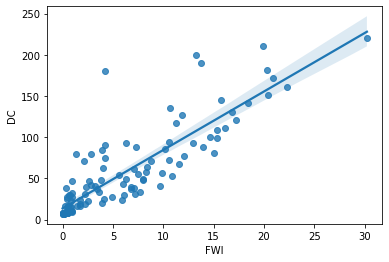

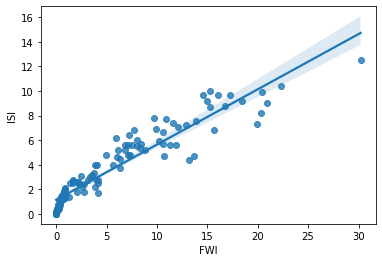

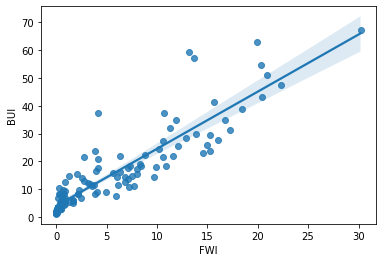

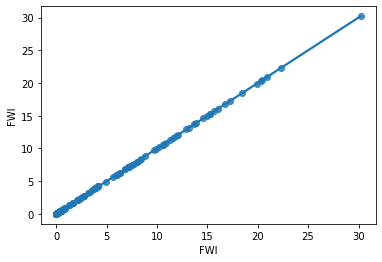

In [64]:
for i in continous_data.columns:
    print('Linear regression plots')
    linear_regression_plot_func(i, continous_data)

### Residuls plots 

Residual plots


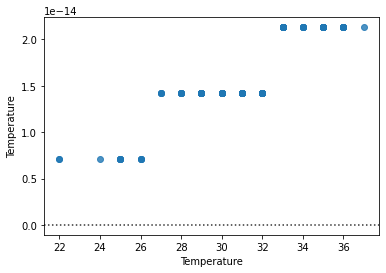

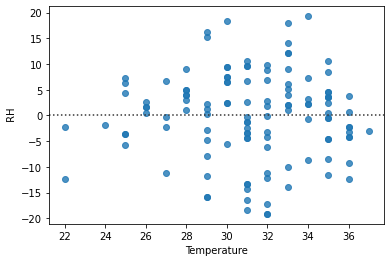

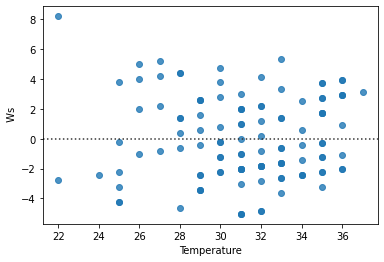

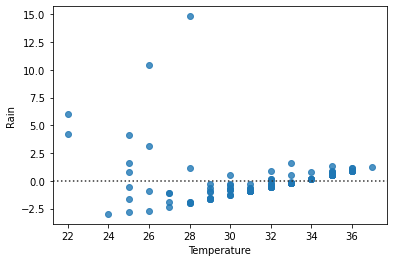

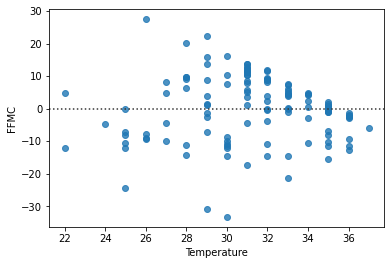

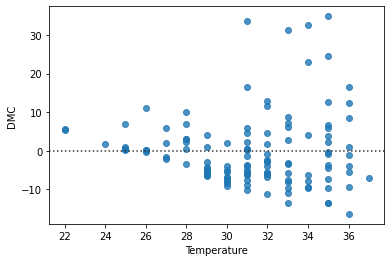

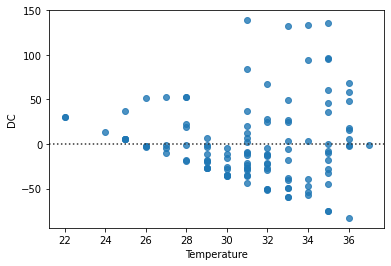

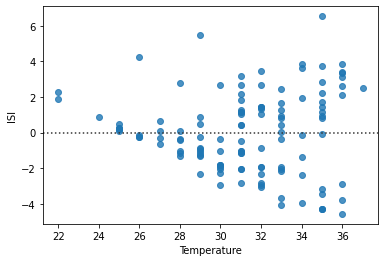

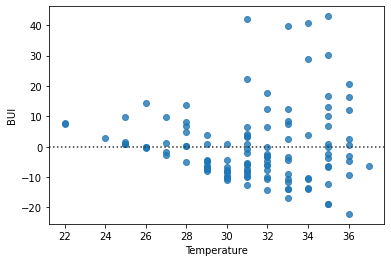

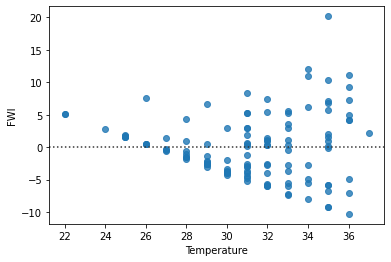

Residual plots


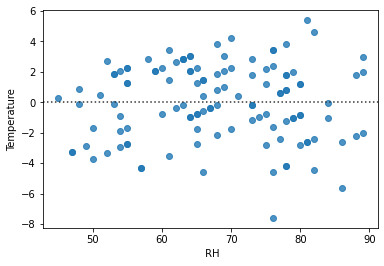

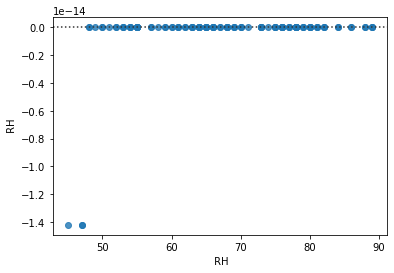

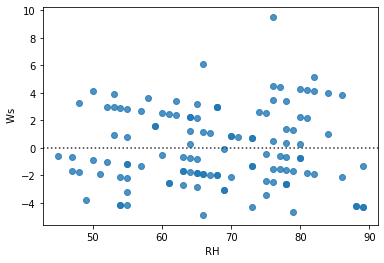

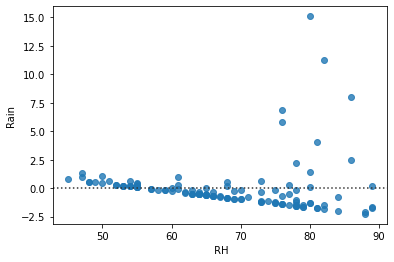

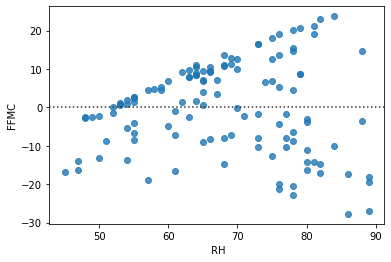

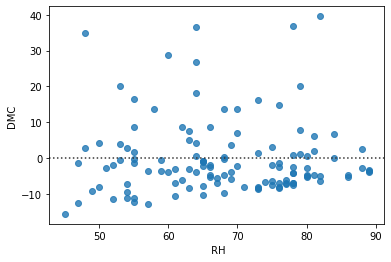

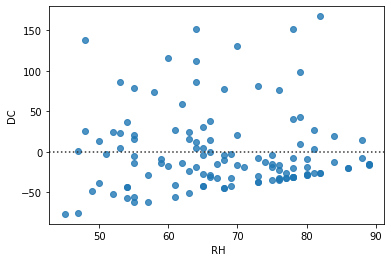

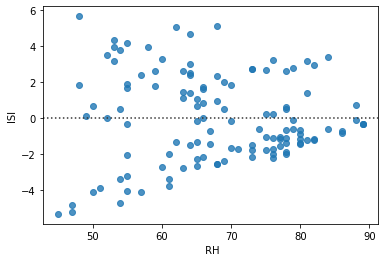

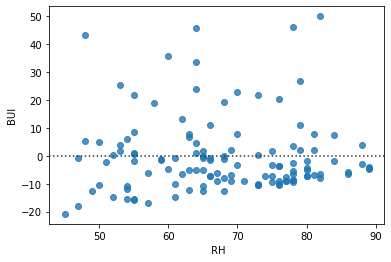

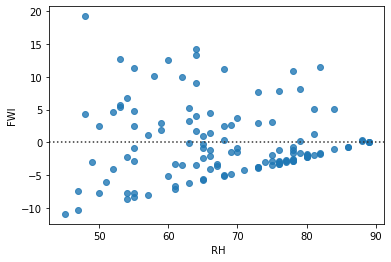

Residual plots


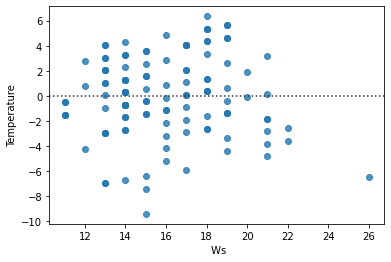

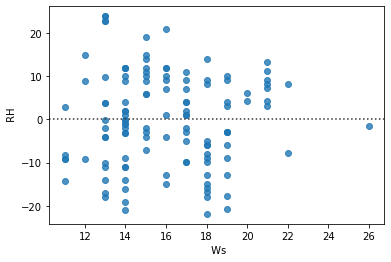

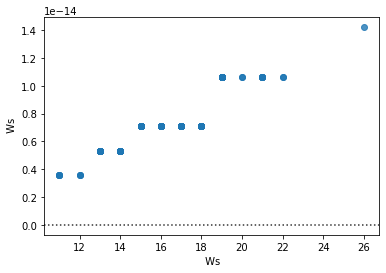

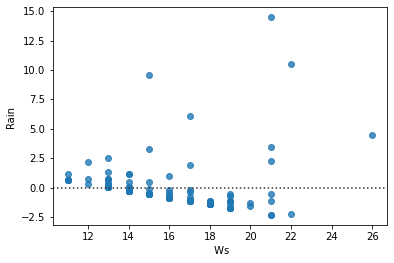

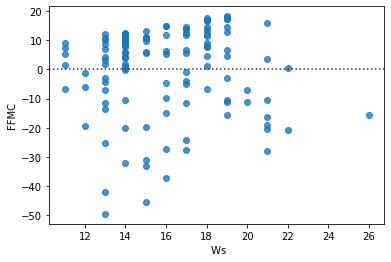

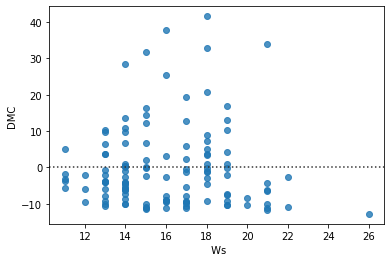

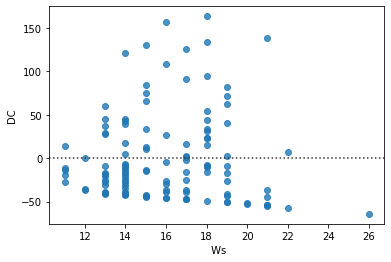

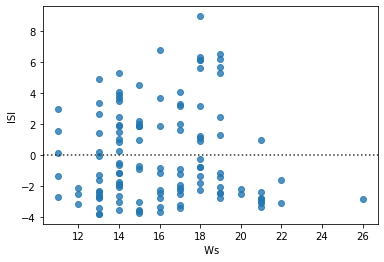

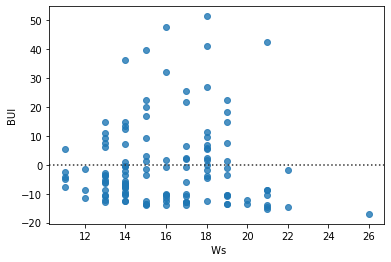

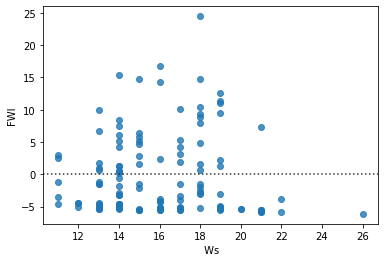

Residual plots


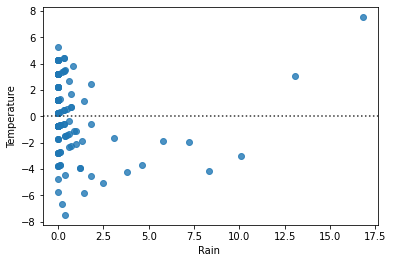

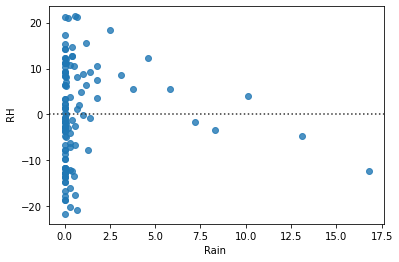

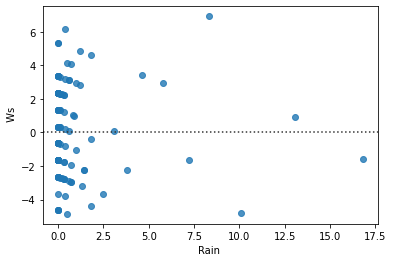

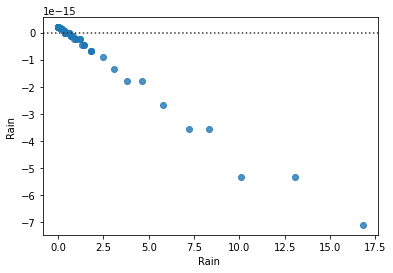

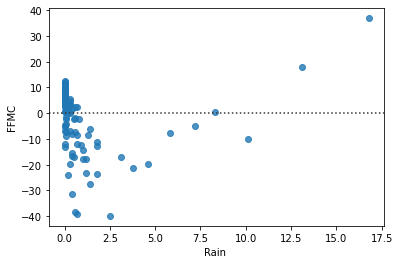

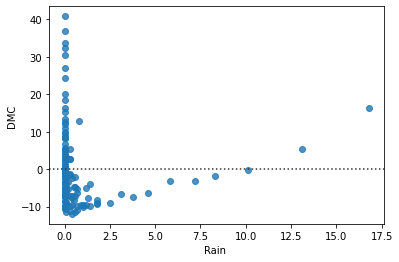

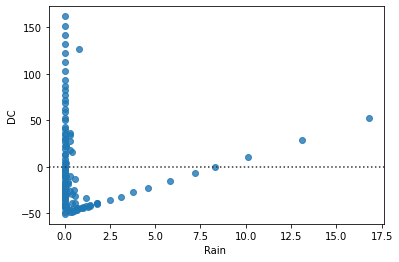

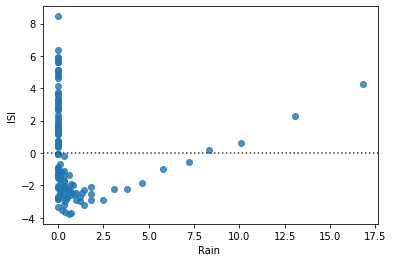

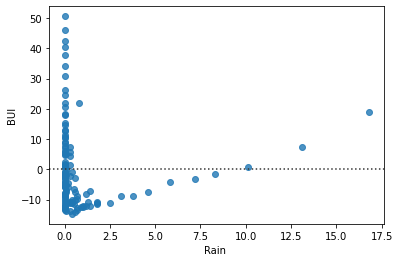

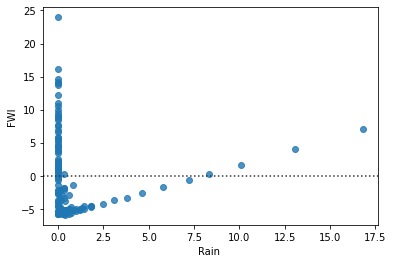

Residual plots


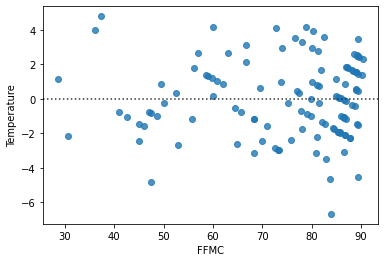

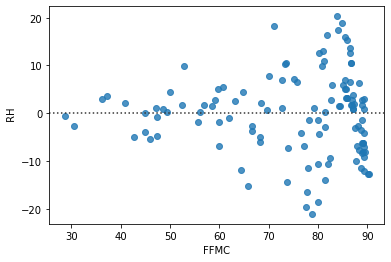

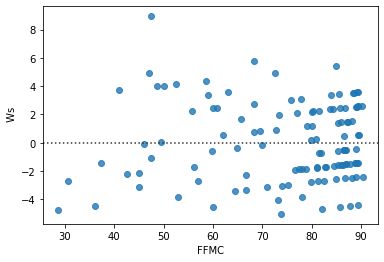

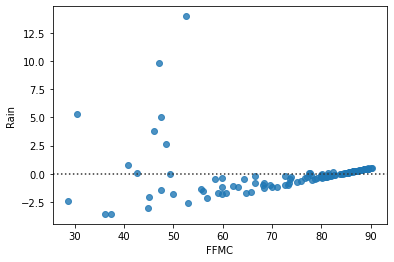

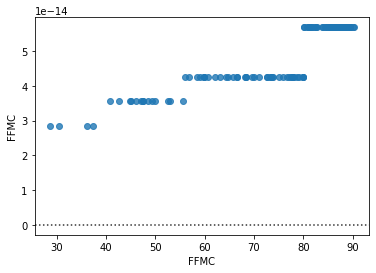

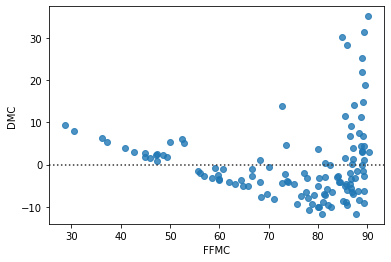

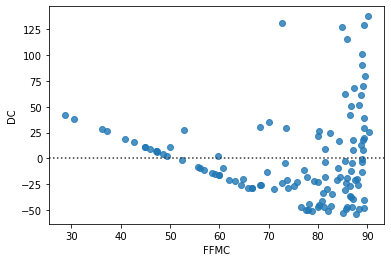

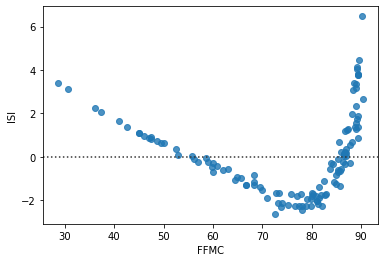

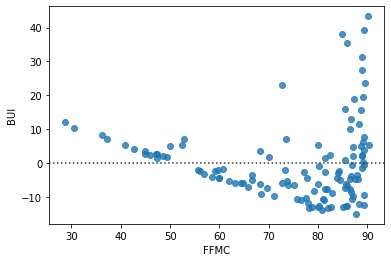

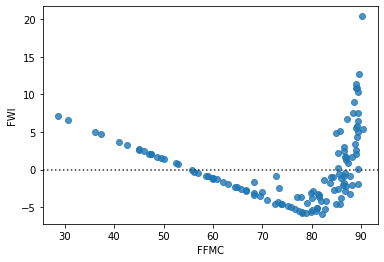

Residual plots


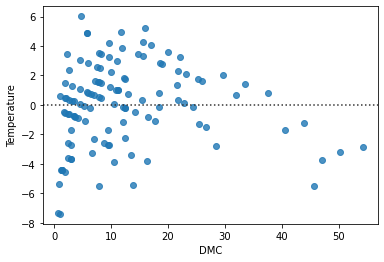

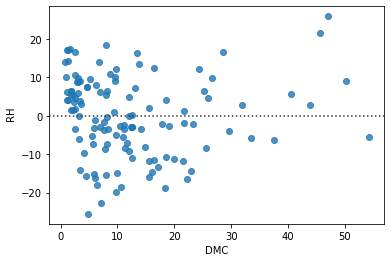

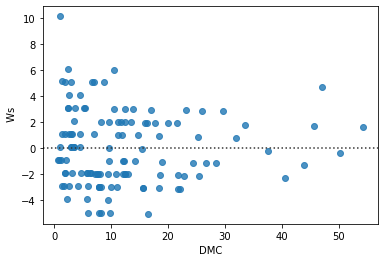

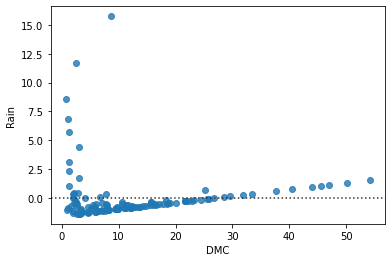

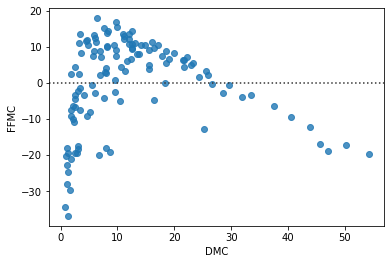

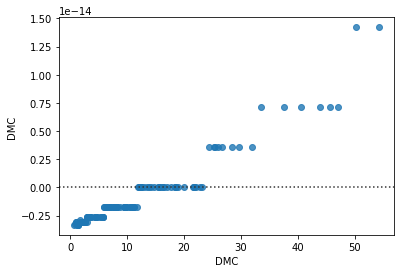

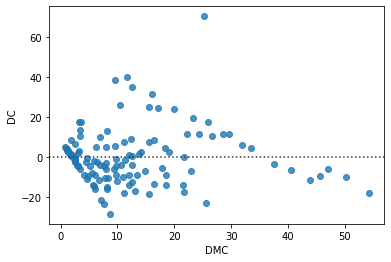

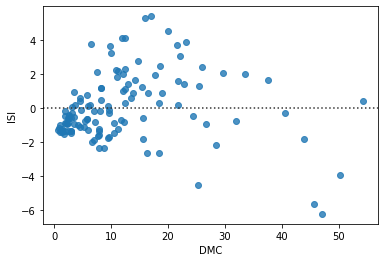

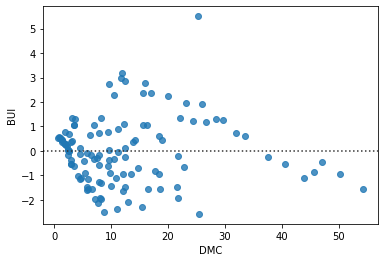

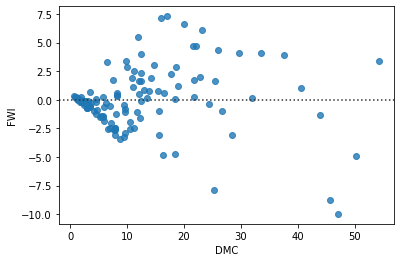

Residual plots


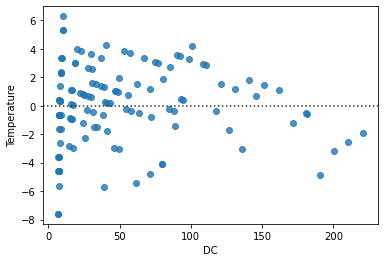

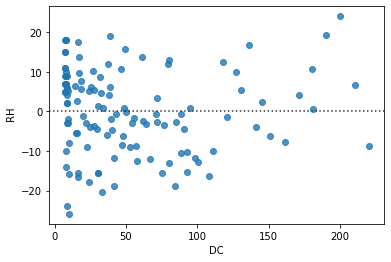

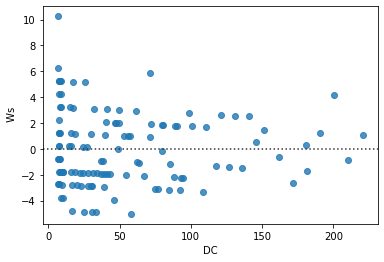

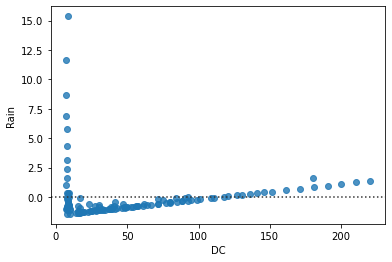

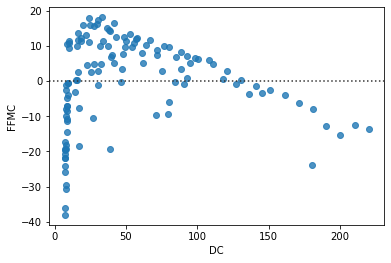

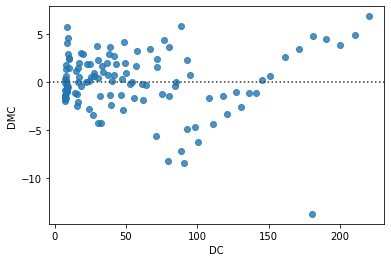

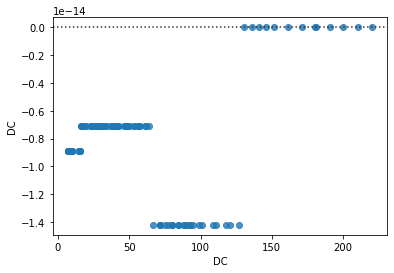

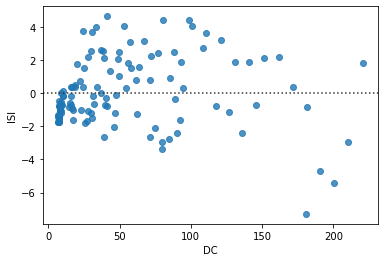

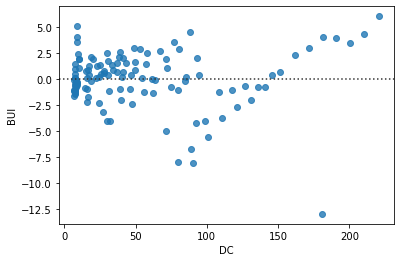

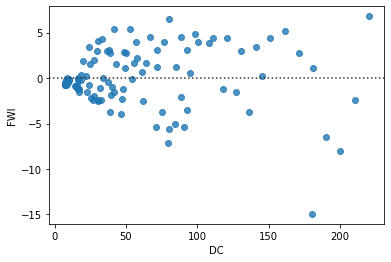

Residual plots


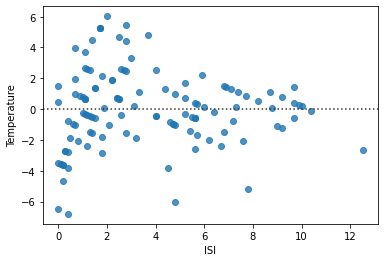

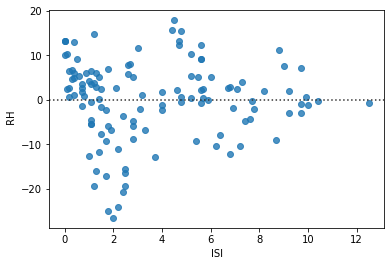

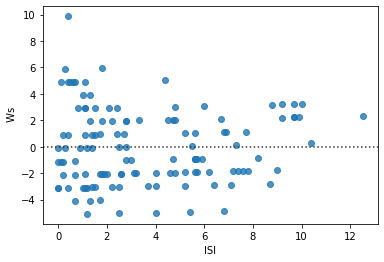

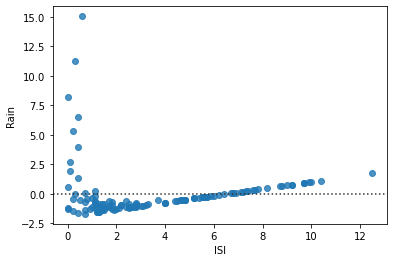

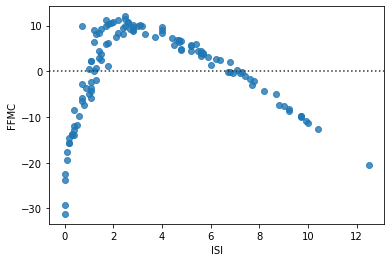

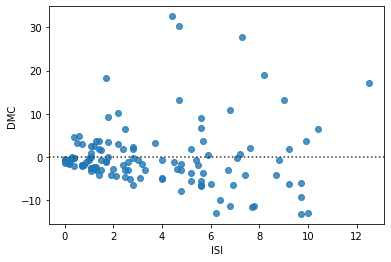

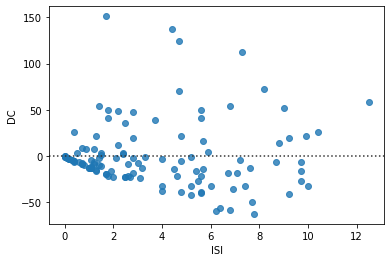

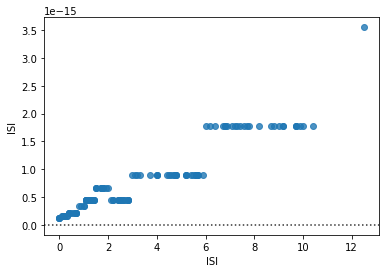

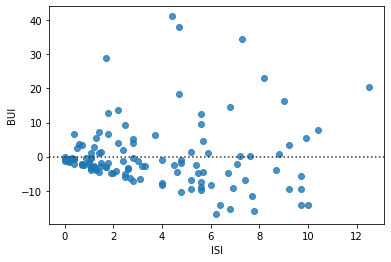

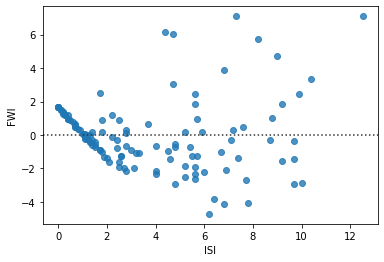

Residual plots


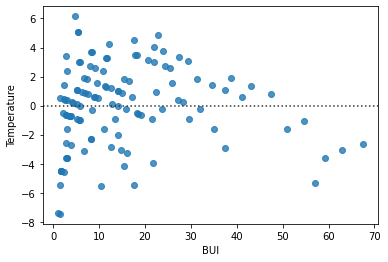

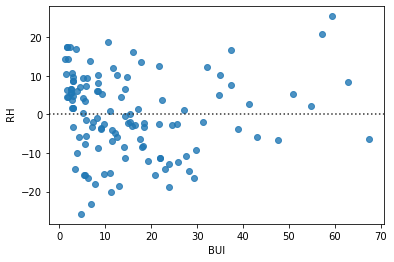

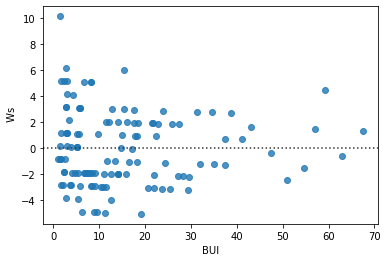

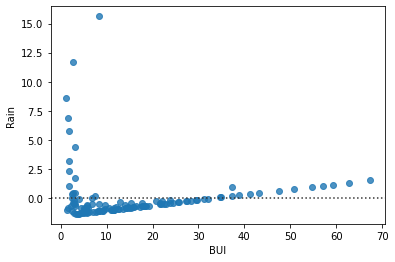

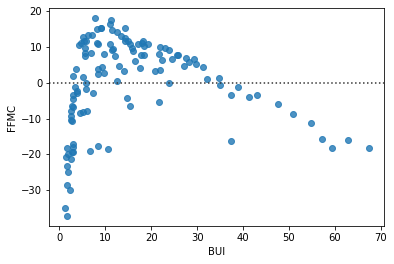

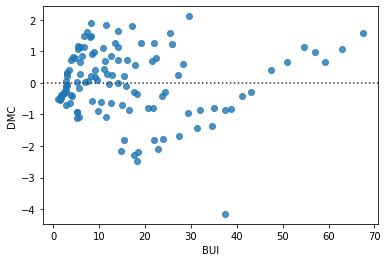

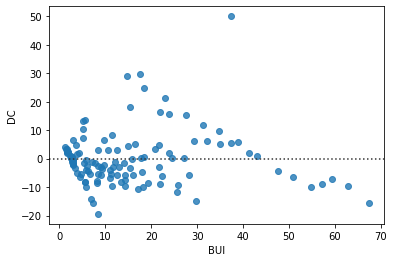

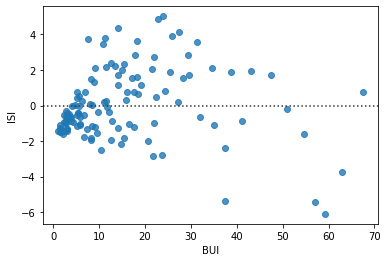

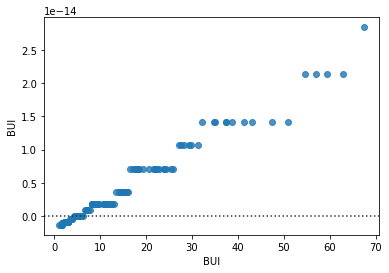

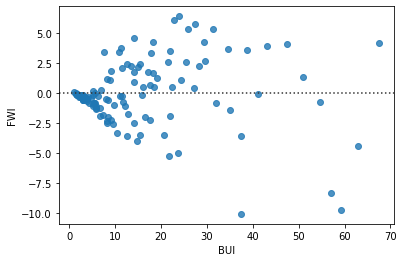

Residual plots


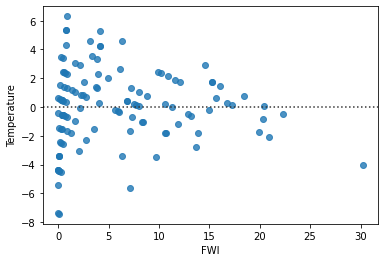

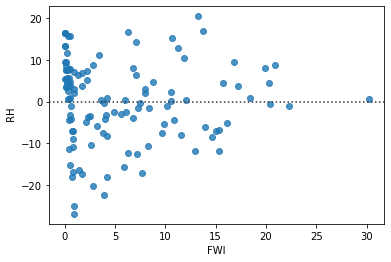

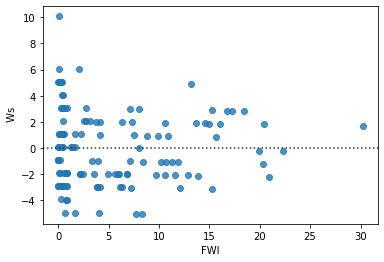

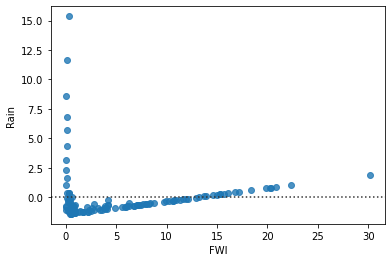

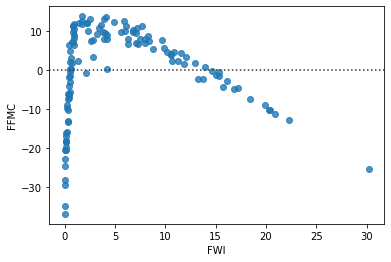

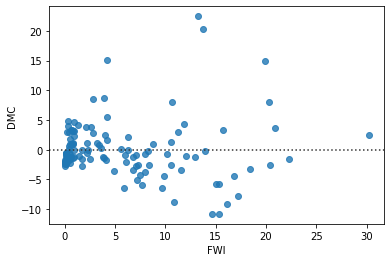

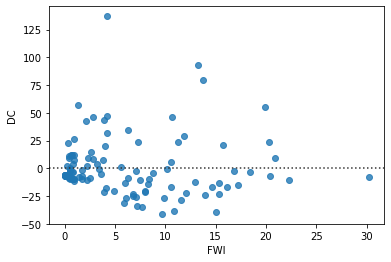

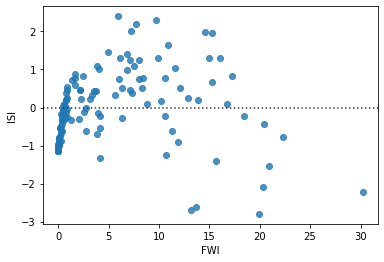

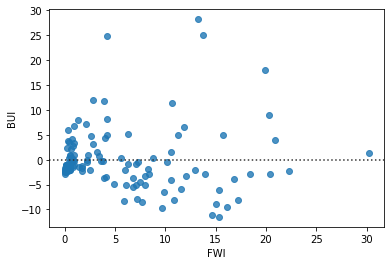

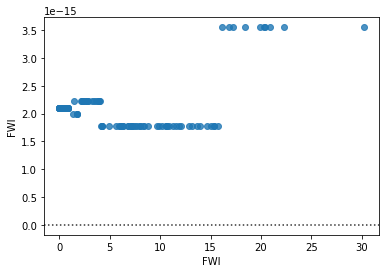

In [65]:
for i in continous_data.columns:
    print('Residual plots')
    resid_plot_func(i, continous_data)

# PCA

In [66]:
continous_data.values

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [32. , 47. , 14. , ...,  1.8,  6.8,  0.9],
       [26. , 80. , 16. , ...,  0.3,  3. ,  0.1],
       [25. , 78. , 14. , ...,  0.2,  2.4,  0.1]])

In [67]:
scaler = preprocessing.StandardScaler().fit_transform(continous_data.values)

In [68]:
scaled_df = pd.DataFrame(columns=continous_data.columns, data = scaler)

In [69]:
scaled_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,-0.659354,-0.988010,0.704943,-0.351193,-0.579094,-0.793971,-0.883547,-0.782804,-0.834294,-0.803842
1,-0.659354,-0.627929,-1.057415,0.190628,-0.662993,-0.731627,-0.883547,-0.882493,-0.799608,-0.819672
2,-1.566585,1.262498,2.114830,5.108701,-1.779495,-0.874127,-0.893243,-1.115101,-0.882855,-0.867163
3,-1.868995,1.892641,-1.057415,0.690771,-2.973443,-0.981003,-0.897122,-1.214790,-0.952228,-0.882993
4,-1.264174,0.812397,0.000000,-0.351193,-0.637178,-0.829596,-0.755555,-0.816034,-0.799608,-0.803842
...,...,...,...,...,...,...,...,...,...,...
117,-0.054533,-1.258071,-1.762358,-0.351193,0.472871,-0.562408,-0.714830,-0.384048,-0.640050,-0.613878
118,-0.054533,-0.177827,-1.762358,-0.351193,0.711661,-0.357564,-0.548052,0.114397,-0.445806,-0.233951
119,0.247877,-1.888213,-0.704943,-0.059443,0.182451,-0.464440,-0.860276,-0.616656,-0.598426,-0.740520
120,-1.566585,1.082458,0.000000,0.399021,-1.760134,-0.838502,-0.881608,-1.115101,-0.862043,-0.867163


In [101]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(scaled_df.values)

In [102]:
pca.components_

array([[ 0.31597455, -0.25171218, -0.04070837, -0.19692747,  0.3415612 ,
         0.36662073,  0.35826891,  0.3702914 ,  0.36682768,  0.38112174],
       [-0.2730736 ,  0.35309443,  0.55484274,  0.41988633, -0.25052903,
         0.26190623,  0.28461631,  0.00644208,  0.27363586,  0.17121902],
       [ 0.2090152 , -0.57697015,  0.48930681,  0.44547468,  0.12666585,
        -0.20450107, -0.21567204,  0.19268061, -0.20810549,  0.02713267],
       [-0.06268373, -0.18976652, -0.66088942,  0.66975317, -0.18942376,
         0.13008776,  0.03140733,  0.01866276,  0.09817812,  0.10458217],
       [ 0.6335986 , -0.10521763,  0.08227622,  0.05633594, -0.20899083,
         0.136695  ,  0.23358468, -0.57227369,  0.16632303, -0.32473671]])

In [103]:
pca.explained_variance_

array([6.0914194 , 1.75152295, 0.7821043 , 0.61418124, 0.33678654])

In [104]:
pca.explained_variance_ratio_

array([0.60414897, 0.17371662, 0.07756936, 0.0609147 , 0.0334026 ])

In [105]:
pca_df = continous_data

In [86]:
pca_df['pc1'] = pcs[:,0]
pca_df['pc2'] = pcs[:,1]
pca_df['pc3'] = pcs[:,2]

In [87]:
pca_df['Class'] = data['Classes  ']

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

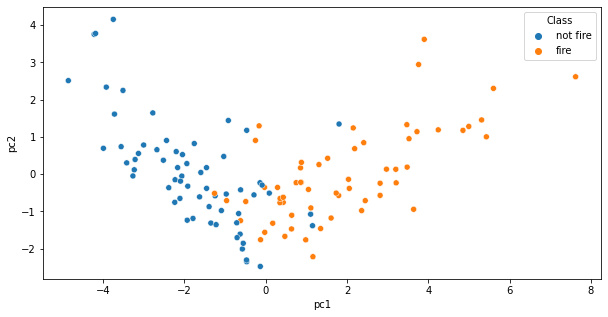

In [88]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=pca_df['pc1'],  y=pca_df['pc2'], hue=pca_df['Class'])

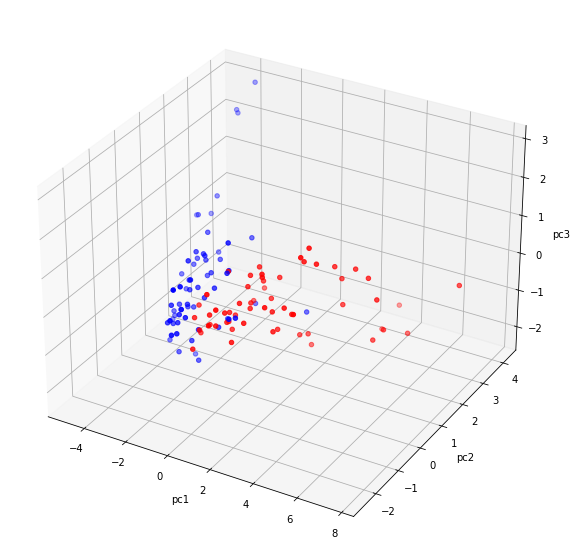

In [89]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_df['pc1']
y = pca_df['pc2']
z = pca_df['pc3']
category = pca_df['Class']
colors = {'fire':'red', 'not fire':'blue'}


ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")


ax.scatter(x, y, z, c=category.map(colors))

plt.show()

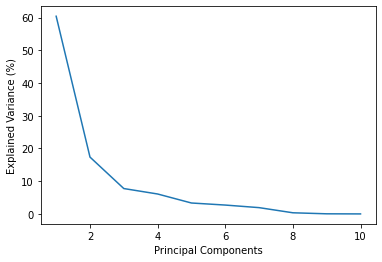

In [100]:
plt.plot((np.arange(pca.n_components_)+1), (pca.explained_variance_ratio_)*100)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.show()

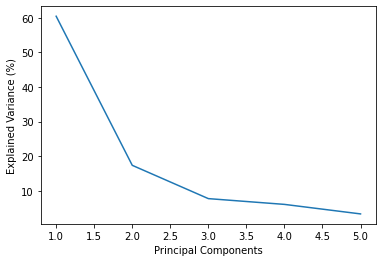

In [106]:
plt.plot((np.arange(pca.n_components_)+1), (pca.explained_variance_ratio_)*100)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.show()

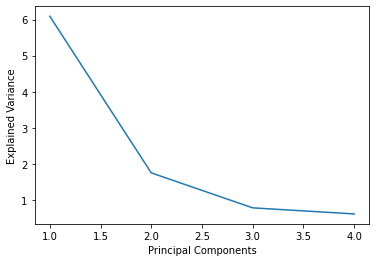

In [80]:
plt.plot((np.arange(pca.n_components_)+1), pca.explained_variance_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()